In [201]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [202]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [203]:
ds_train = tfds.load('colorectal_histology', split='train', shuffle_files=True)

In [204]:
splits = tfds.load('colorectal_histology', split=['train[:60%]', 'train[60%:80%]', 'train[80%:]'], shuffle_files=True)

In [205]:
ds_train = splits[0]
ds_val = splits[1]
ds_test = splits[2]

In [206]:
print(len(ds_train))
print(len(ds_val))
print(len(ds_test))

3000
1000
1000


In [207]:
ds_train.take(1)

<_TakeDataset element_spec={'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(150, 150, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [208]:
for sample in ds_train.take(1):
    print("Keys:", sample.keys())
    print("Image File :", sample['filename'])
    print("Image shape:", sample["image"].shape)
    print("Label:", sample["label"].numpy())
    #print(sample['image'])
    print(sample['image'][:,:,0])
    print(sample['image'][:,:,1])
    print(sample['image'][:,:,2])
    print(sample['label'])

Keys: dict_keys(['filename', 'image', 'label'])
Image File : tf.Tensor(b'160F4_CRC-Prim-HE-08_021.tif_Row_1201_Col_1651.tif', shape=(), dtype=string)
Image shape: (150, 150, 3)
Label: 4
tf.Tensor(
[[173 186 213 ... 213 214 221]
 [153 170 196 ... 215 224 225]
 [134 153 175 ... 204 209 200]
 ...
 [189 203 192 ... 195 197 198]
 [181 184 184 ... 188 184 186]
 [184 178 169 ... 183 179 179]], shape=(150, 150), dtype=uint8)
tf.Tensor(
[[ 82  95  98 ... 106 100 107]
 [ 63  80  90 ... 109 114 115]
 [ 46  65  81 ... 100 106  97]
 ...
 [ 93 107 100 ... 100  97  98]
 [ 89  92  98 ...  98  92  94]
 [ 94  88  85 ...  91  87  87]], shape=(150, 150), dtype=uint8)
tf.Tensor(
[[113 126 139 ... 148 143 150]
 [ 96 113 128 ... 147 151 152]
 [ 78  97 115 ... 133 135 126]
 ...
 [141 155 149 ... 138 135 136]
 [136 139 145 ... 134 131 133]
 [140 134 134 ... 128 124 124]], shape=(150, 150), dtype=uint8)
tf.Tensor(4, shape=(), dtype=int64)


Keys: dict_keys(['filename', 'image', 'label'])
Image File : tf.Tensor(b'160F4_CRC-Prim-HE-08_021.tif_Row_1201_Col_1651.tif', shape=(), dtype=string)
Image shape: (150, 150, 3)
Label: 4
tf.Tensor(
[[173 186 213 ... 213 214 221]
 [153 170 196 ... 215 224 225]
 [134 153 175 ... 204 209 200]
 ...
 [189 203 192 ... 195 197 198]
 [181 184 184 ... 188 184 186]
 [184 178 169 ... 183 179 179]], shape=(150, 150), dtype=uint8)
tf.Tensor(
[[ 82  95  98 ... 106 100 107]
 [ 63  80  90 ... 109 114 115]
 [ 46  65  81 ... 100 106  97]
 ...
 [ 93 107 100 ... 100  97  98]
 [ 89  92  98 ...  98  92  94]
 [ 94  88  85 ...  91  87  87]], shape=(150, 150), dtype=uint8)
tf.Tensor(
[[113 126 139 ... 148 143 150]
 [ 96 113 128 ... 147 151 152]
 [ 78  97 115 ... 133 135 126]
 ...
 [141 155 149 ... 138 135 136]
 [136 139 145 ... 134 131 133]
 [140 134 134 ... 128 124 124]], shape=(150, 150), dtype=uint8)
tf.Tensor(4, shape=(), dtype=int64)


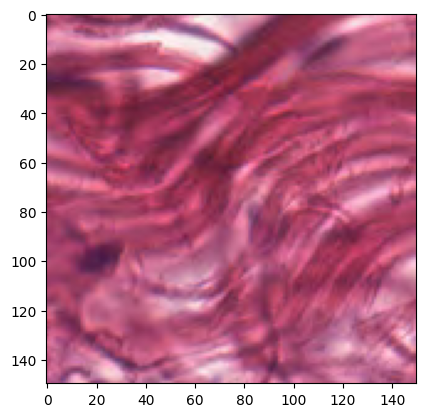

In [209]:
for sample in ds_train.take(1):
    print("Keys:", sample.keys())
    print("Image File :", sample['filename'])
    print("Image shape:", sample["image"].shape)
    print("Label:", sample["label"].numpy())
    #print(sample['image'])
    print(sample['image'][:,:,0])
    print(sample['image'][:,:,1])
    print(sample['image'][:,:,2])
    print(sample['label'])
    plt.imshow(sample['image'])

**Use TF --> Data Generator**

In [210]:
150*150*3 #elements in single image 

67500

Due to large image and large data size we cannot feed the whole data at once but will have to do it in batches.  
Hence we use ImageDataGenerator  

In [211]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [212]:
image_gen = ImageDataGenerator(
                                rotation_range=15, # Apply random rotations to images upto 20 degrees
                                width_shift_range = 0.1, # Apply random shifts to the width of images upto 10%
                                height_shift_range= 0.1, # Apply random shifts to the height of images upto 10%
                                shear_range= 0.1,  # Apply random sheer along an axis to 10% 
                                zoom_range= 0.1, # Apply random zoom upto 10%
                                horizontal_flip= True, # Randomly flip images 
                                fill_mode= 'nearest'  # How empty pixels are filled after transformation 
                                )                                 

In [213]:
labels_train_df = pd.DataFrame(data=[int(sample['label']) for sample in ds_train], columns=['ClassLabel'])
labels_val_df = pd.DataFrame(data=[int(sample['label']) for sample in ds_val], columns=['ClassLabel'])
labels_test_df = pd.DataFrame(data=[int(sample['label']) for sample in ds_test], columns=['ClassLabel'])
labels_train_df.head()

,ClassLabel
0,6
1,7
2,2
3,6
4,2


In [214]:
labels_train_df.value_counts()

ClassLabel
0             391
4             385
6             384
3             380
5             370
2             366
7             365
1             359
Name: count, dtype: int64

In [215]:
print(labels_train_df.nunique())

ClassLabel    8
dtype: int64


In [216]:
from tensorflow.keras.models import Sequential

In [217]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, BatchNormalization, GlobalAveragePooling2D

In [218]:
from tensorflow.keras.optimizers import Adam

In [219]:
CNN_model = Sequential()

CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding= 'valid', strides=(1, 1), activation='relu', input_shape=(150, 150,3)))
#CNN_model.add(BatchNormalization())
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding= 'valid', strides=(1, 1), activation='relu', input_shape=(150, 150,3)))
#CNN_model.add(BatchNormalization())
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

CNN_model.add(Conv2D(filters=256, kernel_size=(3, 3), padding= 'valid', strides=(1, 1), activation='relu', input_shape=(150, 150,3)))
#CNN_model.add(BatchNormalization())
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

CNN_model.add(Flatten())
#CNN_model.add(GlobalAveragePooling2D())

CNN_model.add(Dense(units=512, activation='relu'))
CNN_model.add(Dropout(0.5))

CNN_model.add(Dense(units=8, activation= 'softmax'))  # 8 classes of tumour types

CNN_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\D8CTKCR\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [220]:
CNN_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      37,880,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,255,240 (145.93 MB)

 Trainable params: 38,255,240 (145.93 MB)

 Non-trainable params: 0 (0.00 B)

In [221]:
def convert_to_numpy(dataset):
    images, labels = [], []
    for sample in dataset:
        img = sample['image']
        img = tf.cast(img, dtype='float32')  # Convert to Float 32
        lab = sample['label']
        images.append(img.numpy())
        labels.append(int(lab.numpy()))
    return np.stack(images), np.array(labels)

In [222]:
X_train, y_train = convert_to_numpy(ds_train)
X_val, y_val = convert_to_numpy(ds_val)
X_test, y_test = convert_to_numpy(ds_test)

In [223]:
X_train[0]

array([[[173.,  82., 113.],
        [186.,  95., 126.],
        [213.,  98., 139.],
        ...,
        [213., 106., 148.],
        [214., 100., 143.],
        [221., 107., 150.]],

       [[153.,  63.,  96.],
        [170.,  80., 113.],
        [196.,  90., 128.],
        ...,
        [215., 109., 147.],
        [224., 114., 151.],
        [225., 115., 152.]],

       [[134.,  46.,  78.],
        [153.,  65.,  97.],
        [175.,  81., 115.],
        ...,
        [204., 100., 133.],
        [209., 106., 135.],
        [200.,  97., 126.]],

       ...,

       [[189.,  93., 141.],
        [203., 107., 155.],
        [192., 100., 149.],
        ...,
        [195., 100., 138.],
        [197.,  97., 135.],
        [198.,  98., 136.]],

       [[181.,  89., 136.],
        [184.,  92., 139.],
        [184.,  98., 145.],
        ...,
        [188.,  98., 134.],
        [184.,  92., 131.],
        [186.,  94., 133.]],

       [[184.,  94., 140.],
        [178.,  88., 134.],
        [169.,  

In [224]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [225]:
X_train[0]

array([[[0.6784314 , 0.32156864, 0.44313726],
        [0.7294118 , 0.37254903, 0.49411765],
        [0.8352941 , 0.38431373, 0.54509807],
        ...,
        [0.8352941 , 0.41568628, 0.5803922 ],
        [0.8392157 , 0.39215687, 0.56078434],
        [0.8666667 , 0.41960785, 0.5882353 ]],

       [[0.6       , 0.24705882, 0.3764706 ],
        [0.6666667 , 0.3137255 , 0.44313726],
        [0.76862746, 0.3529412 , 0.5019608 ],
        ...,
        [0.84313726, 0.42745098, 0.5764706 ],
        [0.8784314 , 0.44705883, 0.5921569 ],
        [0.88235295, 0.4509804 , 0.59607846]],

       [[0.5254902 , 0.18039216, 0.30588236],
        [0.6       , 0.25490198, 0.38039216],
        [0.6862745 , 0.31764707, 0.4509804 ],
        ...,
        [0.8       , 0.39215687, 0.52156866],
        [0.81960785, 0.41568628, 0.5294118 ],
        [0.78431374, 0.38039216, 0.49411765]],

       ...,

       [[0.7411765 , 0.3647059 , 0.5529412 ],
        [0.79607844, 0.41960785, 0.60784316],
        [0.7529412 , 0

In [226]:
y_train.shape

(3000,)

In [227]:
y_train

array([4, 5, 5, ..., 2, 1, 7], shape=(3000,))

In [228]:
train_iteration = image_gen.flow(X_train, y_train, batch_size=64, shuffle=True)

In [229]:
train_iteration.y

array([4, 5, 5, ..., 2, 1, 7], shape=(3000,))

In [230]:
from tensorflow.keras.callbacks import EarlyStopping

In [231]:
train_iteration.image_data_generator

In [232]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

We need to convert labels to one hot encoded if we want to use categorical cross entropy as loss function in the model.   

In [233]:
from tensorflow.keras.utils import to_categorical

In [234]:
y_train = to_categorical(y_train, num_classes=8)
y_val = to_categorical(y_val, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

In [235]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(3000, 8))

In [236]:
train_iteration = image_gen.flow(X_train, y_train, batch_size=64, shuffle=True)
val_iteration = ImageDataGenerator().flow(X_val, y_val, batch_size=64, shuffle=False)
test_iteration = ImageDataGenerator().flow(X_test, y_test, batch_size=64, shuffle=False)

In [237]:
print(len(train_iteration), len(val_iteration))

47 16


In [238]:
validation_steps = len(val_iteration)
steps_per_epoch = len(train_iteration)

In [239]:
CNN_model.fit(train_iteration, epochs=50, validation_data=val_iteration, validation_steps=validation_steps, steps_per_epoch= steps_per_epoch, callbacks=[early_stop])

C:\Users\D8CTKCR\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 799ms/step - accuracy: 0.3877 - loss: 1.6059 - val_accuracy: 0.4780 - val_loss: 1.0281
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 801ms/step - accuracy: 0.5633 - loss: 0.9957 - val_accuracy: 0.6630 - val_loss: 0.7943
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 800ms/step - accuracy: 0.6003 - loss: 0.9315 - val_accuracy: 0.6330 - val_loss: 0.7942
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 798ms/step - accuracy: 0.6813 - loss: 0.7955 - val_accuracy: 0.6280 - val_loss: 0.8301
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 817ms/step - accuracy: 0.6913 - loss: 0.7576 - val_accuracy: 0.7250 - val_loss: 0.7122
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 801ms/step - accuracy: 0.7307 - loss: 0.6829 - val_accuracy: 0.5940 - val_loss: 0.8318
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 800ms/step - accuracy: 0.7323 - loss: 0.6589 - val_accuracy: 0.7470 - val_loss: 0.7653
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 821ms/step - accuracy: 0.7367 - loss: 0.6808 - val_accu

In [240]:
len(train_iteration.x)

3000

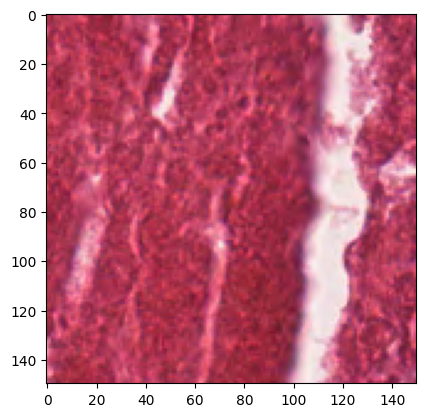

In [241]:
plt.imshow(train_iteration.x[11])

In [242]:
metrics = pd.DataFrame(CNN_model.history.history)

In [243]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.387667,1.605947,0.478,1.028051
1,0.563333,0.995707,0.663,0.794302
2,0.600333,0.931508,0.633,0.794169
3,0.681333,0.795486,0.628,0.830117
4,0.691333,0.757570,0.725,0.712234


<Axes: >

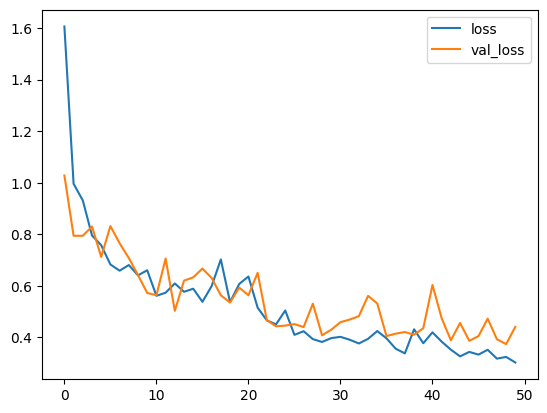

In [244]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

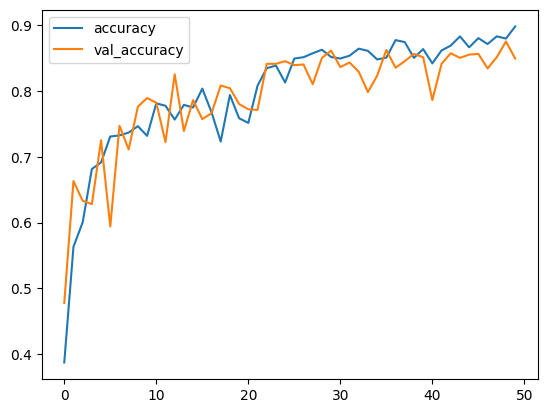

In [245]:
metrics[['accuracy', 'val_accuracy']].plot()

In [246]:
test_predictions = CNN_model.predict(X_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


In [247]:
test_predictions

array([[9.9999988e-01, 7.4220502e-23, 1.0107038e-07, ..., 8.7661145e-13,
        3.7267126e-27, 8.3204549e-23],
       [9.9999762e-01, 4.5716840e-19, 1.9035616e-06, ..., 5.8498656e-10,
        3.3863823e-23, 1.8236169e-19],
       [5.6929472e-03, 1.3113722e-05, 3.2651156e-02, ..., 2.5807881e-01,
        1.1568987e-11, 4.6914117e-10],
       ...,
       [6.3873973e-04, 1.8542253e-04, 1.3661813e-02, ..., 8.9985299e-01,
        2.3136228e-10, 1.9720454e-12],
       [1.1184000e-03, 9.5740771e-03, 3.1527036e-01, ..., 1.5121593e-01,
        1.0851230e-06, 5.9470823e-15],
       [1.5874489e-06, 1.8877250e-01, 5.5259148e-05, ..., 1.3507753e-06,
        4.8744246e-06, 7.4267432e-06]], shape=(1000, 8), dtype=float32)

In [248]:
y_test_predict = np.argmax(test_predictions, axis=1)

In [249]:
y_test_predict

array([0, 0, 3, 1, 3, 1, 3, 7, 4, 3, 2, 4, 7, 5, 7, 4, 3, 7, 4, 0, 5, 3,
       1, 4, 5, 7, 6, 4, 5, 3, 7, 3, 2, 0, 0, 3, 2, 2, 3, 0, 4, 2, 4, 0,
       5, 5, 6, 0, 0, 0, 7, 2, 0, 3, 5, 3, 1, 7, 7, 5, 2, 2, 2, 3, 6, 5,
       2, 6, 0, 0, 1, 1, 1, 5, 5, 6, 2, 5, 2, 4, 7, 7, 5, 2, 1, 4, 5, 5,
       7, 0, 5, 1, 3, 6, 0, 4, 1, 6, 7, 6, 7, 2, 5, 3, 4, 5, 5, 4, 7, 1,
       2, 1, 0, 3, 3, 7, 7, 2, 3, 1, 6, 1, 5, 2, 1, 0, 7, 3, 6, 4, 4, 4,
       6, 2, 2, 7, 4, 0, 6, 7, 4, 7, 4, 0, 5, 6, 5, 4, 6, 1, 5, 7, 1, 3,
       5, 3, 5, 0, 6, 3, 1, 6, 2, 4, 4, 6, 0, 4, 4, 6, 4, 5, 6, 0, 4, 3,
       4, 2, 3, 0, 4, 2, 3, 2, 3, 4, 0, 6, 2, 1, 2, 4, 7, 4, 5, 1, 6, 7,
       3, 3, 2, 1, 3, 1, 4, 4, 1, 5, 4, 2, 4, 7, 7, 3, 4, 4, 2, 3, 5, 0,
       3, 2, 3, 7, 5, 4, 4, 3, 5, 5, 4, 6, 0, 3, 2, 1, 5, 2, 1, 1, 6, 5,
       0, 7, 1, 5, 7, 5, 7, 3, 7, 6, 3, 3, 6, 7, 2, 5, 2, 1, 4, 7, 6, 2,
       1, 6, 1, 7, 0, 4, 2, 1, 3, 3, 3, 4, 6, 2, 7, 6, 4, 5, 6, 4, 4, 7,
       7, 2, 5, 7, 1, 6, 1, 7, 6, 4, 4, 7, 2, 7, 4,

In [250]:
print(X_test.shape)
print(y_test_predict.shape)

(1000, 150, 150, 3)
(1000,)


In [251]:
from sklearn.metrics import classification_report, confusion_matrix

In [252]:
y_test = np.argmax(y_test, axis=1)

In [253]:
y_test

array([0, 0, 5, 1, 3, 1, 3, 7, 4, 3, 2, 4, 7, 5, 7, 1, 3, 7, 4, 0, 5, 3,
       1, 4, 5, 7, 6, 4, 5, 3, 7, 5, 1, 0, 2, 3, 2, 2, 3, 0, 4, 2, 4, 0,
       5, 5, 6, 0, 0, 0, 7, 2, 0, 3, 5, 3, 1, 7, 7, 5, 2, 2, 2, 3, 6, 5,
       1, 6, 0, 0, 1, 1, 1, 5, 5, 6, 2, 2, 2, 1, 7, 6, 5, 2, 1, 4, 5, 5,
       7, 0, 5, 1, 5, 6, 0, 5, 1, 6, 7, 6, 7, 2, 5, 3, 5, 5, 5, 4, 7, 1,
       1, 2, 0, 3, 3, 7, 7, 2, 3, 1, 6, 1, 5, 2, 1, 0, 7, 3, 6, 6, 1, 4,
       6, 4, 2, 7, 4, 0, 6, 7, 1, 7, 4, 2, 5, 6, 5, 1, 6, 1, 5, 7, 1, 3,
       5, 3, 2, 0, 6, 3, 1, 6, 3, 4, 5, 6, 0, 4, 4, 6, 4, 5, 6, 0, 4, 3,
       4, 2, 3, 2, 1, 2, 3, 2, 3, 4, 0, 6, 3, 1, 2, 1, 7, 4, 5, 1, 6, 7,
       3, 3, 1, 1, 5, 1, 1, 4, 1, 5, 1, 2, 4, 7, 7, 3, 4, 4, 3, 3, 5, 0,
       2, 2, 3, 7, 5, 4, 4, 3, 5, 5, 4, 6, 0, 3, 2, 1, 5, 1, 1, 1, 6, 5,
       0, 7, 1, 5, 7, 5, 7, 3, 7, 6, 3, 3, 6, 7, 2, 5, 2, 1, 4, 6, 6, 2,
       1, 6, 1, 7, 0, 5, 2, 1, 5, 3, 3, 4, 6, 2, 6, 6, 4, 5, 6, 4, 4, 6,
       7, 2, 5, 7, 1, 6, 1, 7, 6, 1, 4, 7, 2, 7, 4,

In [254]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       112
           1       0.83      0.61      0.70       127
           2       0.80      0.78      0.79       137
           3       0.89      0.95      0.92       126
           4       0.71      0.89      0.79       126
           5       0.95      0.82      0.88       128
           6       0.97      0.92      0.94       118
           7       0.93      1.00      0.96       126

    accuracy                           0.86      1000
   macro avg       0.87      0.87      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [255]:
print(confusion_matrix(y_test, y_test_predict))

[[109   0   2   0   0   1   0   0]
 [  0  77  17   0  33   0   0   0]
 [  9   9 107   6   3   3   0   0]
 [  1   0   5 120   0   0   0   0]
 [  0   7   2   0 112   1   3   1]
 [  5   0   0   9   9 105   0   0]
 [  0   0   0   0   1   0 108   9]
 [  0   0   0   0   0   0   0 126]]


In [256]:
import seaborn as sns

<Axes: >

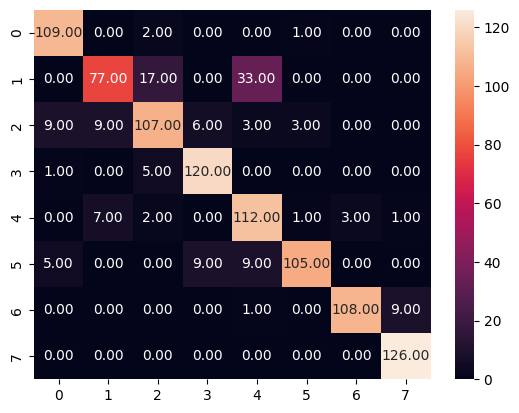

In [258]:
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='.2f')